In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  LSTM
from tensorflow.keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
data = pd.read_excel('../raw_data/full_data_clean.xlsx', engine='openpyxl')

In [3]:
data = data.drop(columns = 'Unnamed: 0')

In [4]:
data = data.sort_values('amount')

In [5]:
data = data.reset_index(drop = True)

In [6]:
data

,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
0,PAGADO,INDIVIDUAL,Osteoporosis,REEMBOLSO,No Informado,Estado No Identificado,F,61,29,0,2018-09-20,60-69,Hospitalización
1,PAGADO,INDIVIDUAL,Otras Enfermedades De Los Tejidos Duros De Los...,REEMBOLSO,No Informado,Estado No Identificado,F,43,29,0,2018-09-14,40-49,Hospitalización
2,PAGADO,INDIVIDUAL,Sinusitis Aguda,REEMBOLSO,No Informado,Estado No Identificado,M,50,29,0,2019-02-07,50-59,Hospitalización
3,PENDIENTE,COLECTIVO,Sindrome Vertiginoso,REEMBOLSO,No Informado,Estado No Identificado,M,79,29,0,2020-06-09,Mayor a 70,Hospitalización
4,PENDIENTE,COLECTIVO,Quiste Ovario,CARTA AVAL,CLINICA,Distrito Capital,F,43,29,0,2021-02-18,40-49,Ambulatorio
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151246,PAGADO,INDIVIDUAL,Fibrosis Y Cirrosis Del Higado,REEMBOLSO,No Informado,Estado No Identificado,M,60,15,272065,2020-08-31,60-69,Hospitalización
151247,PAGADO,INDIVIDUAL,Insuficiencia Cardiaca,REEMBOLSO,No Informado,Estado No Identificado,M,72,15,314479,2018-09-20,Mayor a 70,Hospitalización
151248,PAGADO,INDIVIDUAL,Tumor Maligno De Los Bronquios Y Del Pulmon,REEMBOLSO,No Informado,Estado No Identificado,M,62,15,390533,2020-08-21,60-69,Hospitalización
151249,PAGADO,INDIVIDUAL,Tumor Maligno De Los Bronquios Y Del Pulmon,REEMBOLSO,No Informado,Estado No Identificado,M,69,15,526543,2020-01-18,60-69,Hospitalización


In [7]:
p30 = int((((len(data))*30)/100))
int(p30)

45375

In [8]:
data.iloc[[p30]]

,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
45375,PAGADO,COLECTIVO,Infeccion Viral,EMERGENCIA,CLINICA,Aragua,M,6,29,24,2019-05-02,0-9,Ambulatorio


In [9]:
p80 = int(((len(data))*80)/100)
int(p80)

121000

In [10]:
data.iloc[[p80]]

,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
121000,PAGADO,COLECTIVO,Trastorno Interno De La Rodilla,CARTA AVAL,CLINICA,Distrito Capital,F,69,29,397,2020-12-11,60-69,Ambulatorio


In [11]:
# data.tail(20)

In [12]:
data.drop(data.index[0:p30],inplace=True)

In [13]:
# data.drop(data.index[p80:],inplace=True)

In [14]:
data.describe()

,age,country_id,amount
count,105876.000000,105876.000000,105876.000000
mean,43.597916,28.336148,919.993634
std,22.313946,4.191204,4912.397729
min,0.000000,1.000000,24.000000
25%,29.000000,29.000000,53.000000
50%,45.000000,29.000000,141.000000
75%,61.000000,29.000000,495.000000
max,100.000000,85.000000,657312.000000


In [16]:
data.head()

,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
45375,PAGADO,COLECTIVO,Infeccion Viral,EMERGENCIA,CLINICA,Aragua,M,6,29,24,2019-05-02,0-9,Ambulatorio
45376,PAGADO,COLECTIVO,Control General De Salud De Rutina De Subpobla...,REEMBOLSO,No Informado,Estado No Identificado,M,68,29,24,2020-12-28,60-69,Hospitalización
45377,PAGADO,INDIVIDUAL,Hiperplasia De La Prostata,REEMBOLSO,No Informado,Estado No Identificado,M,79,29,24,2020-02-10,Mayor a 70,Hospitalización
45378,PAGADO,INDIVIDUAL,Traumatismos Superficiales Que Afectan Multipl...,REEMBOLSO,No Informado,Estado No Identificado,F,16,29,24,2020-07-31,2019-10-01 00:00:00,Hospitalización
45379,PAGADO,COLECTIVO,Cervicalalgia/Hernia Discal,REEMBOLSO,No Informado,Estado No Identificado,F,65,29,24,2020-10-14,60-69,Hospitalización


In [17]:
data = data.reset_index(drop = True)

In [18]:
data

,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
0,PAGADO,COLECTIVO,Infeccion Viral,EMERGENCIA,CLINICA,Aragua,M,6,29,24,2019-05-02,0-9,Ambulatorio
1,PAGADO,COLECTIVO,Control General De Salud De Rutina De Subpobla...,REEMBOLSO,No Informado,Estado No Identificado,M,68,29,24,2020-12-28,60-69,Hospitalización
2,PAGADO,INDIVIDUAL,Hiperplasia De La Prostata,REEMBOLSO,No Informado,Estado No Identificado,M,79,29,24,2020-02-10,Mayor a 70,Hospitalización
3,PAGADO,INDIVIDUAL,Traumatismos Superficiales Que Afectan Multipl...,REEMBOLSO,No Informado,Estado No Identificado,F,16,29,24,2020-07-31,2019-10-01 00:00:00,Hospitalización
4,PAGADO,COLECTIVO,Cervicalalgia/Hernia Discal,REEMBOLSO,No Informado,Estado No Identificado,F,65,29,24,2020-10-14,60-69,Hospitalización
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105871,PAGADO,INDIVIDUAL,Fibrosis Y Cirrosis Del Higado,REEMBOLSO,No Informado,Estado No Identificado,M,60,15,272065,2020-08-31,60-69,Hospitalización
105872,PAGADO,INDIVIDUAL,Insuficiencia Cardiaca,REEMBOLSO,No Informado,Estado No Identificado,M,72,15,314479,2018-09-20,Mayor a 70,Hospitalización
105873,PAGADO,INDIVIDUAL,Tumor Maligno De Los Bronquios Y Del Pulmon,REEMBOLSO,No Informado,Estado No Identificado,M,62,15,390533,2020-08-21,60-69,Hospitalización
105874,PAGADO,INDIVIDUAL,Tumor Maligno De Los Bronquios Y Del Pulmon,REEMBOLSO,No Informado,Estado No Identificado,M,69,15,526543,2020-01-18,60-69,Hospitalización


In [19]:
data.query('insurance_type == "INDIVIDUAL" & claim_type == "EMERGENCIA"', inplace = True)

In [21]:
data = data.reset_index(drop = True)

In [22]:
data

,status,insurance_type,disease,claim_type,provider_type,state,sex,age,country_id,amount,date_issue,age_range,h_type
0,PAGADO,INDIVIDUAL,Hipertension Arterial Y Sus Complicaciones,EMERGENCIA,CLINICA,Zulia,M,59,29,24,2018-12-26,50-59,Ambulatorio
1,PAGADO,INDIVIDUAL,Traumatismo Y Herida De La Cabeza,EMERGENCIA,CLINICA,Tachira,F,5,29,24,2019-10-08,0-9,Ambulatorio
2,PAGADO,INDIVIDUAL,Lumbalgia,EMERGENCIA,CLINICA,Zulia,F,47,29,24,2019-10-11,40-49,Ambulatorio
3,PAGADO,INDIVIDUAL,Bronquitis Aguda,EMERGENCIA,CLINICA,Tachira,M,42,29,24,2018-12-01,40-49,Ambulatorio
4,PAGADO,INDIVIDUAL,Infeccion Viral,EMERGENCIA,CLINICA,Zulia,M,2,29,24,2019-10-13,0-9,Ambulatorio
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9052,PENDIENTE,INDIVIDUAL,Traumatismo Superficial Y Herida Del Tobillo ...,EMERGENCIA,CLINICA,Distrito Capital,M,30,29,100000,2021-03-06,30-39,Ambulatorio
9053,PENDIENTE,INDIVIDUAL,Intoxicacion Alimentaria Bacteriana,EMERGENCIA,CLINICA,Lara,F,14,29,100000,2021-03-08,2019-10-01 00:00:00,Hospitalización
9054,PENDIENTE,INDIVIDUAL,Infeccion Viral - Covid 19 Sospechoso,EMERGENCIA,CLINICA,Distrito Capital,M,63,29,100000,2020-12-27,60-69,Hospitalización
9055,PAGADO,INDIVIDUAL,Cardiopatia Isquemica:Angina De Pecho-Infarto ...,EMERGENCIA,CLINICA,Distrito Capital,M,77,29,197185,2019-01-31,Mayor a 70,Hospitalización


In [23]:
data.to_excel('../raw_data/data_test1.xlsx', engine='openpyxl')

In [24]:
data_daily = data.groupby(data.date_issue, as_index = False).agg({'amount':'sum'})
data_daily.columns = ['date_issue','total_amount_claims']

In [25]:
data_daily

,date_issue,total_amount_claims
0,2018-09-01,168
1,2018-09-02,311
2,2018-09-03,7185
3,2018-09-04,4100
4,2018-09-05,3497
...,...,...
912,2021-03-04,102035
913,2021-03-05,65304
914,2021-03-06,208034
915,2021-03-07,85163


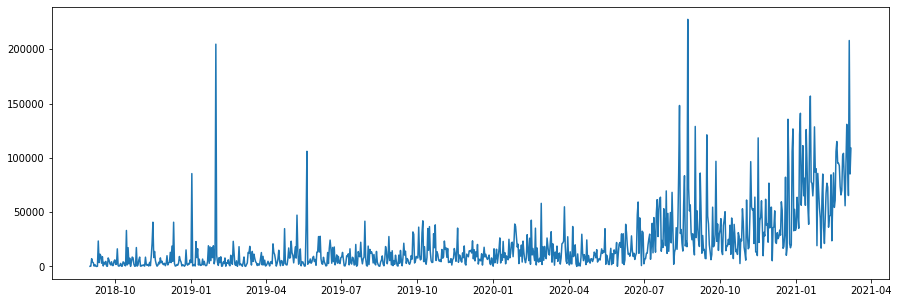

In [26]:
plt.figure(figsize=(15,5))
plt.plot(data_daily.date_issue, data_daily.total_amount_claims)

In [27]:
# to find out how many values are equals to cero
(data['amount'] == 0).sum()

0